# Homework 1: General Python, IPython, and NumPy
**Created by:**&emsp;**Jacob Norman**  
**Date:**&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;&nbsp;**1/28/2019**
## Overview
This homework assigment covers content from Jake Vanderplaas' texts *A Whirlwind Tour of Python* and chapters 1 and 2 of *Python Data Science Handbook*. This includes general Python lessons, IPython, and NumPy. Considering that general Python and IPython are baked into NumPy data manipulation, this homework will focus more heavily on NumPy. I realize that most of these operations would be easier with Pandas, but I am testing my knowledge of NumPy here.
## General Python and IPython
The first part of my learning in Python includes general Python syntax, rules, and tips. It was a refresher of things learned in PCDA. This was done through reading Jake Vanderplaas' *A Whirlwind Tour of Python*. Most of the things touched on I already had a basic grasp of, such as the fact that Python uses zero-based indexing. Many of Python's basic functions I already knew how to use as well. I knew that Python was a dynamically-typed language, but I did not know what the underlying reasoning for this was. I never realized that variables in Python were more akin to pointers than buckets. I was shocked to realize that if you have two variables pointing to the same mutable object, if you change one of the pointers than the other is changed as well.  

Other things I remember touching on in class but definitely needed some help on were list comprehensions and lambda functions. Specifically, lambda functions used with ``map`` seem like a very powerful operation that can be performed on iterators. As far as IPython goes, most of the useful things I learned dealt with debugging or optimizing code for efficiency. Keybard shortcuts are useful as well. My favorite new thing I learned was the ``%time`` and ``timeit`` magic commands. We will use these shortly.

In [17]:
# Import necessary libraries and create a dataframe
import numpy as np
import pandas as pd
batters = pd.read_csv('data/mlb_batting_2018.csv')
batters.head(10)

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
0,1,Jose Abreu\abreujo02,31,CHW,AL,128,553,499,68,132,...,0.473,0.798,118.0,236,14,11,0,6,7,*3D
1,2,Ronald Acuna\acunaro01,20,ATL,NL,111,487,433,78,127,...,0.552,0.917,144.0,239,4,6,0,3,2,78/9D
2,3,Jason Adam\adamja01,26,KCR,AL,1,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0,0,0,1
3,4,Willy Adames\adamewi01,22,TBR,AL,85,323,288,43,80,...,0.406,0.754,109.0,117,6,1,1,2,3,64
4,5,Austin L. Adams\adamsau02,27,WSN,NL,2,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0,0,0,/1
5,6,Chance Adams\adamsch01,23,NYY,AL,1,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0,0,0,/1
6,7,Lane Adams\adamsla01,28,ATL,NL,26,29,25,10,6,...,0.520,0.865,130.0,13,1,0,0,0,0,/987
7,8,Matt Adams*\adamsma01,29,TOT,NL,121,337,306,42,73,...,0.477,0.786,105.0,146,6,4,0,0,3,37/D9
8,9,Matt Adams*\adamsma01,29,WSN,NL,94,277,249,37,64,...,0.510,0.842,118.0,127,6,4,0,0,2,37/D9
9,10,Matt Adams*\adamsma01,29,STL,NL,27,60,57,5,9,...,0.333,0.533,43.0,19,0,0,0,0,1,3


The above dataframe is a complete list of standard batting statistics for every player in the 2018 MLB season. This list includes multiple entries if the player played on multiple teams during the course of the season. Since we are only interested in NumPy arrays and Python lists, were are going to ignore the obvious text cleanup in the *Name* column. Additionally, we are going to ignore the multiple entires for certain players, as that is more of a Pandas data wrangling issue.  

We are going to create a Python list of just home runs and perform a variety of operations on the list.

In [29]:
# Create a list of home runs
hr = batters.HR.tolist()
hr[:10]

[22, 26, 0, 10, 0, 0, 2, 21, 18, 3]

Let's start with some basic summary statistics, usuing Python operations only.

In [71]:
# Summary stats
avg = sum(hr) / len(hr)
std_dev = 0
diffsquared = 0
sum_diffsquared = 0
for val in hr:
  diffsquared = (val-avg)**2
  sum_diffsquared = diffsquared + sum_diffsquared
std_dev = ((sum_diffsquared)/len(hr))**(1/2)

print('Mean home runs:\t', avg)
print('Std home runs:\t', std_dev)
print('Min home runs:\t', min(hr))
print('Max home runs:\t', max(hr))

Mean home runs:	 4.001951854261549
Std home runs:	 7.564642014811744
Min home runs:	 0
Max home runs:	 48


**Note:** *Can you explain why ``diffsquared`` is red? I cannot figure out why.*

Now let's compute the average number of home runs per game for each player. We'll use 162 even though  each player's actual games played varies from the 162-game season. In the interest of space, we will only do the calculations on the first 50 players. This is a good opportunity to test out a lambda function in conjuction with ``map``.

In [90]:
# Home runs per game, first 50 players
hr_game_func = lambda x: x / 162
hr_game = []
for val in map(hr_game_func, hr[:50]):
    hr_game.append(val)
hr_game

[0.13580246913580246,
 0.16049382716049382,
 0.0,
 0.06172839506172839,
 0.0,
 0.0,
 0.012345679012345678,
 0.12962962962962962,
 0.1111111111111111,
 0.018518518518518517,
 0.018518518518518517,
 0.037037037037037035,
 0.21604938271604937,
 0.09876543209876543,
 0.0,
 0.0,
 0.14814814814814814,
 0.0,
 0.0,
 0.0,
 0.06172839506172839,
 0.0,
 0.0,
 0.0,
 0.012345679012345678,
 0.018518518518518517,
 0.0,
 0.030864197530864196,
 0.1419753086419753,
 0.04938271604938271,
 0.08024691358024691,
 0.0,
 0.0,
 0.04938271604938271,
 0.0,
 0.06790123456790123,
 0.0,
 0.0,
 0.0,
 0.0,
 0.12345679012345678,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.037037037037037035,
 0.16666666666666666]

Could this also be done with a list comprehension? Possibly faster? Lets try it, this time computing for all players.

In [87]:
[i / 162 for i in hr[:50]]

[0.13580246913580246,
 0.16049382716049382,
 0.0,
 0.06172839506172839,
 0.0,
 0.0,
 0.012345679012345678,
 0.12962962962962962,
 0.1111111111111111,
 0.018518518518518517,
 0.018518518518518517,
 0.037037037037037035,
 0.21604938271604937,
 0.09876543209876543,
 0.0,
 0.0,
 0.14814814814814814,
 0.0,
 0.0,
 0.0,
 0.06172839506172839,
 0.0,
 0.0,
 0.0,
 0.012345679012345678,
 0.018518518518518517,
 0.0,
 0.030864197530864196,
 0.1419753086419753,
 0.04938271604938271,
 0.08024691358024691,
 0.0,
 0.0,
 0.04938271604938271,
 0.0,
 0.06790123456790123,
 0.0,
 0.0,
 0.0,
 0.0,
 0.12345679012345678,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.037037037037037035,
 0.16666666666666666]

In [95]:
%%timeit
hr_game = []
for val in map(hr_game_func, hr):
    hr_game.append(val)

1000 loops, best of 3: 320 µs per loop


In [94]:
%timeit [i / 162 for i in hr]

10000 loops, best of 3: 109 µs per loop


As shown above, the list comprehension is almost 3 times faster than the mapping lambda function loop. Additionally, the list comprehension was able to compute 10 times more loops then the lambda loop. The list comprehension is also much quicker and more intuitive to write. Therefore, I believe that is the more "Pythonic" way to approach this type of problem.

## NumPy
What I remember about NumPy from PCDA is that the functions in the package were more important than dealing with NumPy arrays themselves. Pandas dataframes seem more suited to working with large data sets, while NumPy is more suited for single variable data. After all, Pandas is the natural extension of NumPy, and the two packages work hand in hand. For this reason, it is somewhat difficult to do an entire homework assignment using this package and without Pandas. We discussed this potential issue in our email correspondence. The rest of this assignemnt will deal primarily with NumPy, but also dabble in Pandas and MatPlotLib where appropriate.  

That said, actually reading the section on NumPy in *Python Data Science Handbook* did offer me several revelations. NumPy arrays, unlike Python lists, can only contain one data type. Initally, I assumed this was a limit on NumPy, but after reading I realized it was a necessary restriction to the package. It makes computing operations and aggregates easier and faster. Python has its own fixed-type array package, ``array``, but NumPy is much more powerful, and therefore, more widely used. Addtionally, I did not know that NumPy offers structured arrays that function similarly to Pandas' dataframes. This functionality, which I will likely never use outside of this homework assignment, is useful to know. Also, NumPy vectorized operations makes loops even more obselete and reminded me of working in R.

Overall, a review of NumPy helped solidify Python concepts, such as index slicing, that will benefit me moving forward. It was similar to working with Python lists with R logic. This section is a foundation for the next 3 chapters in *Python Data Science Handbook*.

In [98]:
#Convert hr list to NumPy array
hr_array = np.array(hr)
hr_array

array([22, 26,  0, ...,  0,  9, 20])

First, let's fix that mapping function to work on an array instead of a list. Now we can use the actual number of games played for each player. Let's compute the average number of home runs per game for each player.

In [195]:
games = np.array(batters.G)
hr_game_func2 = lambda x, y: x / y
hr_game2 = []
for val in map(hr_game_func2, hr_array, games):
    hr_game2.append(val)
hr_game2_array = np.array(hr_game2)
print('Average home runs per game: {:.4f}'.format(hr_game2_array.mean()))

Average home runs per game: 0.0439


Alternatively, this can be done even more simply using vectorized operations with NumPy.

In [181]:
print((hr_array / games).mean())
(hr_array / games).mean() == hr_game2_array.mean()

0.0439449178095


True

Both calculations are equivalent, but I bet that the vectorized approach is significantly faster.

In [182]:
%timeit (hr_array / games).mean()

The slowest run took 1601.48 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 14.5 µs per loop


In [183]:
%%timeit
hr_game2 = []
for val in map(hr_game_func2, hr_array, games):
    hr_game2.append(val)
hr_game2_array = np.array(hr_game2)
hr_game2_array.mean()

100 loops, best of 3: 4.12 ms per loop


As predicted, the vectorized method is significantly faster. It did 100 more iterations and was almost 300 times faster.  

Computing summary statistics with NumPy arrays is much easier than in base Python.

In [99]:
print('Mean home runs', hr_array.mean())
print('Std home runs:', hr_array.std())
print('Min home runs:', hr_array.min())
print('Max home runs:', hr_array.max())

Mean home runs 4.00195185426
Std home runs: 7.56464201481
Min home runs: 0
Max home runs: 48


These are the same numbers, computed with NumPy functions; no loops required. We can easily add more calculations as well.

In [193]:
print('25th percentile home runs:', np.percentile(hr_array,25))
print('Median home runs:\t  ', np.median(hr_array))
print('75th percentile home runs:', np.percentile(hr_array,75))
print('95th percentile home runs:', np.percentile(hr_array,95))
print('99th percentile home runs:', np.percentile(hr_array,99))

25th percentile home runs: 0.0
Median home runs:	   0.0
75th percentile home runs: 4.0
95th percentile home runs: 22.0
99th percentile home runs: 34.0


Notice the significant jump from the 75th percentile to the 95th percentile. This suggests, as is commonly known, that it is hard to hit a lot of dingers!  

Using Pandas, summarizing the sample data becomes even quicker and easier.

In [109]:
batters.HR.describe()

count    1537.000000
mean        4.001952
std         7.567104
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        48.000000
Name: HR, dtype: float64

Based on the summary statistics, the distribution of home runs looks like it will be skewed to the right. Let's check with a histogram.

In [113]:
# Import MatPlotLib
%matplotlib inline
import matplotlib.pyplot as plt
# I like ggplot
plt.style.use('ggplot')

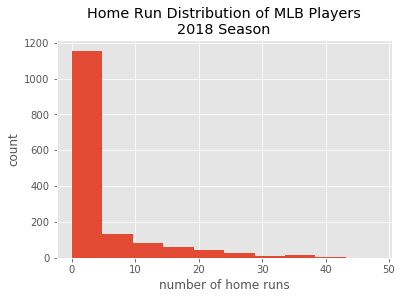

In [123]:
plt.hist(hr_array)
plt.title('Home Run Distribution of MLB Players\n2018 Season')
plt.xlabel('number of home runs')
plt.ylabel('count');

Our suspicions are confirmed. The majority of players in the MLB have less than 10 home runs.

In [141]:
print('Percent of players with less than 10 home runs in 2018: {:.2f}%'.format(
    (len(hr_array[hr_array < 10]) / len(hr_array)*100)))

Percent of players with less than 10 home runs in 2018: 83.86%


In fact, over 83% of all MLB players in 2018 had less than 10 home runs.  

Now let's move on to multivariate structured arrays. We are essentially creating a dataframe in the structure of an array. This is a somewhat tedious process, especially considering we already have the dataframe handy. Also, the final product is very ugly to look at.

In [172]:
#Create lists of various batting statistics
home_runs = batters.HR.tolist()
slugging = batters.SLG.tolist()
obp = batters.OBP.tolist()
ops = batters.OPS.tolist()
rbi = batters.RBI.tolist()
ibb = batters.IBB.tolist()
at_bats = batters.AB.tolist()
hits = batters.H.tolist()

# Create empty structured-array
data = np.zeros(len(home_runs), dtype={'names':('home_runs', 'slugging', 'obp', 'ops', 
                                                'rbi', 'ibb', 'at_bats', 'hits'),
                          'formats':('i4', 'f8', 'f8', 'f8', 'i4', 'i4', 'i4', 'i4')})

#Map lists to array
data['home_runs'] = home_runs
data['slugging'] = slugging
data['obp'] = obp
data['ops'] = ops
data['rbi'] = rbi
data['ibb'] = ibb
data['at_bats'] = at_bats
data['hits'] = hits
str(data)

'[(22,  0.473,  0.325,  0.798, 78, 7, 499, 132)\n (26,  0.552,  0.366,  0.917, 64, 2, 433, 127)\n ( 0,    nan,    nan,    nan,  0, 0,   0,   0) ...,\n ( 0,  0.   ,  0.   ,  0.   ,  0, 0,   2,   0)\n ( 9,  0.44 ,  0.378,  0.817, 58, 1, 455, 139)\n (20,  0.41 ,  0.259,  0.669, 44, 0, 373,  75)]'

One thing that *Python Data Science Handbook* didn't touch on is how to plot structured arrays. Is there any special notation required? Let's try it out by checking if the data supplied is accurate. Specifically, if on-base percentage (OBP) plus slugging is equal to OPS.

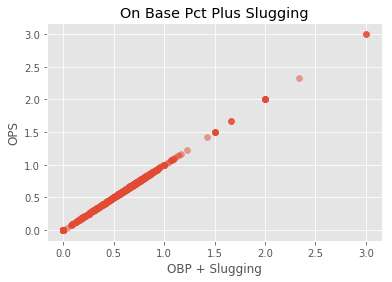

In [173]:
x = (data['obp'] + data['slugging'])
y = data['ops']

plt.scatter(x, y, alpha=0.5)
plt.title('On Base Pct Plus Slugging')
plt.xlabel('OBP + Slugging')
plt.ylabel('OPS')
plt.show();

Hey, it works! The linear relationship suggests the data is accurate. Let's move on to some more interesting plots.

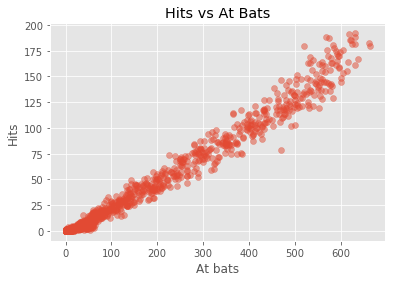

In [175]:
x = data['at_bats']
y = data['hits']

plt.scatter(x, y, alpha=0.5)
plt.title('Hits vs At Bats')
plt.xlabel('At bats')
plt.ylabel('Hits')

plt.show();

> Wow! A truly stunning revelation: the more chances a player has at the plate, the more hits they accumulate. On a serious note, this plot was more linear that I thought it would be.

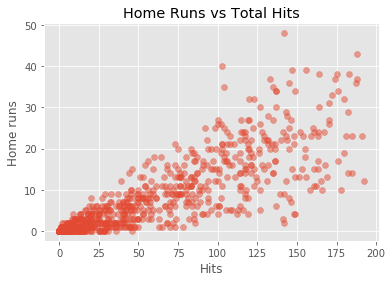

In [196]:
x = data['hits']
y = data['home_runs']

plt.scatter(x, y, alpha=0.5)
plt.title('Home Runs vs Total Hits')
plt.xlabel('Hits')
plt.ylabel('Home runs')

plt.show();

> Generally speaking, it appears that the more plate appearances a player gets, the more home runs they have. Although the variance on this plot appears to be quite large, suggesting that at-bats is not an accurate measure of future home runs. The scatter plot seems to funnel outward as the number of at-bats increases, indicating that as a player gets more plate appearances, there is a wider spread for home runs.

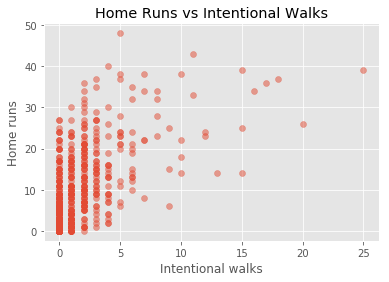

In [191]:
x = data['ibb']
y = data['home_runs']

plt.scatter(x, y, alpha=0.5)
plt.title('Home Runs vs Intentional Walks')
plt.xlabel('Intentional walks')
plt.ylabel('Home runs')

plt.show();

> This is an interesting plot. I would say generally that the more intentional walks a player has (> 5), the more home runs they are likely to have. The reason I chose this plot is because pitchers sometimes intentionally walk players that they fear will hit a home run. This led me to believe that players who have a lot of intentional walks will have a higher number of home runs. This appears to be true, but most players are intentionally walked less than 5 times. Their home runs totals are also in the normal range. So players that are above the 95th percentile for home runs tend to be walked more.

## Conclusion
This homework was a crash course in general Python, IPython, and NumPy. I threw in some Pandas and MatPlotLib out of necessity and ease of use. This will lead in well to the next chapters of *Python Data Science Handbook*: Pandas and MatPlotLib.  

I am planning on doing at least 2 more homework assignments, plus the final project. They will resemble something like the following:
- HW2: Pandas, MatPlotLib, and SciKitLearn
- HW3: Python for Excel and other topics from [*Automate the Boring Stuff*](https://automatetheboringstuff.com/)

I am debating breaking up HW2 into two sections. Let me know what you think.